In [0]:
# author: Asmaa ~ 2019
# ----------------------

# import libraries
import matplotlib.pyplot as plt
from tensorflow.keras import models
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Creating the model

In [0]:
# load dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# reshape the images to clearify the number of color channels
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# normalize images
training_images=training_images / 255.0
test_images=test_images / 255.0

In [5]:
# initialize the model
model = tf.keras.models.Sequential()

# add layers
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


# set functional properties
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# start training
model.fit(training_images, training_labels, epochs=5)

W0809 07:56:36.792685 140432139204480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1204 - acc: 0.9625
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0409 - acc: 0.9875
Epoch 3/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0286 - acc: 0.9910
Epoch 4/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0202 - acc: 0.9938
Epoch 5/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0164 - acc: 0.9945


In [44]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 423us/sample - loss: 0.0286 - acc: 0.9915


# Visualizing the output of each layer

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


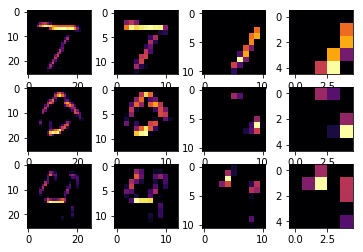

In [43]:
# print first 50 test labels
print(test_labels[0:50])

# arbitary images
FIRST_IMAGE=0    #7
SECOND_IMAGE=3   #0
THIRD_IMAGE=4    #4

# arbitary convolution
CONVOLUTION_NUMBER = 63

# get the output of each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

# prepare the figure
f, axarr = plt.subplots(3,4)

# loop on the first four layers and visualize the samples
for x in range(0,4):
  
  # visualize first image
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  # visualize second image
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  # visualize third image
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)